<center><b>Task 2. Named entity recognition + image classification</b></center>

In this task, you will work on building your ML pipeline that consists of 2 models responsible for
totally different tasks. The main goal is to understand what the user is asking (NLP) and check if
he is correct or not (Computer Vision).

You will need to:

* find or collect an animal classification/detection dataset that contains at least 10
classes of animals.
* train NER model for extracting animal titles from the text. Please use some
transformer-based model (not LLM).
* Train the animal classification model on your dataset.
* Build a pipeline that takes as inputs the text message and the image.

In [13]:
!pip install -r requirements.txt
!pip install transformers==4.37.2
!pip install datasets==3.3.2

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<center><b>Image classification model </b></center>
For creation of model for image classification of animals i need labeled dataset of animals' images that consist of, at least, 10 classes. I found one on kaggle, credit: <url> https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset</url>. During the training, I used only 100 images for each animal.  <u>For training you need to download folders "Training Data" and "Testing Data", rename them as "train_data" and "test_data" , respectively, and paste in the directory with the script.</u>

 Below is a class of model for image classification. As we can see, the model can be saved in .h5 format, but github does not allow to save files more than 25 mb, so we need to train the model each time.

Architecture of the model consist of: 
* input of (64,64,1) tensor, 

* Convolution layer with 32 filters of (3,3) size with relu activation, 

* MaxPooling layer, 

* Convoluition layer with 64 filters of (3,3) with relu activation, 

* MaxPooling layer, 

* Convolution layer with 128 filters of (3,3) size with relu activation, 

* MaxPooling layer, 

* Convoluition layer with 256 filters of (3,3) with relu activation, 

* MaxPooling layer, 

* Flatten layer and then Dense layers with 512, 256, 128 neurons, respectively, with relu as activation function, 

* The final layer is a dense of 15 neurons with softmax as activation function. 

As a loss function for training of this model was used the "sparse_categorical_crossentropy" and Adam as an optimizer. 

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Input, Conv2D,MaxPooling2D,Conv3D,MaxPooling3D
import numpy as np
from keras.models import load_model
class CNNClassifier:
    """
    Convolution Neural Network model
    """

    def __init__(self,path=None):
        if path is None:
            input = Input(shape=(64,64,1), dtype=tf.float32)

            conv1 = Conv2D(32, (3, 3), activation='relu', name='conv_layer_1')(input)
            pool1 = MaxPooling2D((2, 2), name='maxpool_layer_1')(conv1)
            conv2 = Conv2D(64, (3, 3), activation='relu', name='conv_layer_2')(pool1)
            pool2 = MaxPooling2D((2, 2), name='maxpool_layer_2')(conv2)
            conv3 = Conv2D(128, (3, 3), activation='relu', name='conv_layer_3')(pool2)
            pool3 = MaxPooling2D((2, 2), name='maxpool_layer_3')(conv3)
            conv4 = Conv2D(256, (3, 3), activation='relu', name='conv_layer_4')(pool3)
            pool4 = MaxPooling2D((2, 2), name='maxpool_layer_4')(conv4)

            flatten = Flatten()(pool2)
            dense1 = Dense(512, activation='relu', name='dense_layer_1')(flatten)
            dense2 = Dense(256, activation='relu', name='dense_layer_2')(dense1)
            dense3 = Dense(128, activation='relu', name='dense_layer_3')(dense2)
            output_layer = Dense(15, activation='softmax', name='output_layer')(dense3)
            self.model = Model(inputs=input, outputs=output_layer)
            self.model.summary()
        else:
            self.model=load_model('image_classification_model.h5')
    def train(self,x_train,y_train):
        x_train=x_train.reshape((x_train.shape[0],64, 64,1))
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(x_train, y_train,epochs=10, batch_size=32)

    def predict(self,x_test):
        x_test = x_test.reshape((x_test.shape[0], 64, 64,1))
        y_pred = self.model.predict(x_test)
        return np.argmax(y_pred, axis=1)

    def save(self,path):
        self.model.save(path)




Aftter creation of model's class, we can train it. We read directories of "train_data" and "test_data", where images separated into folders for each animal. As I said, for each animal i use only 100 images. The output of the model is an animal index (model is similar to the Convolution Neural Network in the Task 1).


In [15]:
import tensorflow as tf
import numpy as np
from image_classification_model import CNNClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os

train_path='train_data/'
test_path='test_data/'

X = []
Y = []

def load_img(img):
    img=tf.io.read_file(img)
    img=tf.image.decode_jpeg(img,channels=1)
    img=tf.cast(img,tf.float32)/255
    img=tf.image.resize(img,(64,64))
    return img

def import_folder(path,max_count=100):
    x_data,y_data=[],[]
    for animal_folder in os.listdir(train_path):
        count=0
        for image_path in os.listdir(os.path.join(train_path,animal_folder)):
            if count>max_count:
                break
            x_data.append(load_img(os.path.join(train_path,animal_folder,image_path)))
            y_data.append(str.lower(animal_folder))
            count+=1

    return np.array(x_data),np.array(y_data)



x_train,y_train=import_folder(train_path,200)
x_test,y_test=import_folder(test_path)
print('Importing is finished.')


labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.transform(y_test)
print('LabelEncoding is finished.')


model=CNNClassifier()

print('\nStart training.')
model.train(x_train,y_train)
y_pred=model.predict(x_test)
model.save('image_classification_model.h5')
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score for test data: {acc_score}')



Importing is finished.
LabelEncoding is finished.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 62, 62, 32)        320       
                                                                 
 maxpool_layer_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv_layer_2 (Conv2D)       (None, 29, 29, 64)        18496     
                                                                 
 maxpool_layer_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_

<center><b>Name Entity Recognition model</b></center>
After we created an image classification model, we can move on to the next part is the Name Entity Recognition model.

This model was created with finetuning of the BERT model from HuggingFace. Dataset for finetuning was collected with generative services, which generate sentences that include animals' name we want to recognize. 

For creation of dataset i create arrays with labels. Then i process sentences through BertTokenizer and set tags for tokens. These arrays with tags will be Y arrays similar to label of animal used as result for image classification. After mapping the tags, i resize all arrays of tokens to the same length with setting 0 to empty elements. This is need for set dataset ready for training.

In [16]:
from transformers import TFBertForTokenClassification,BertTokenizerFast
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import Dataset, DatasetDict
import numpy as np
import tensorflow as tf


######################################################################################################################################################################################################################################
train_texts = [
    "I saw a beetle in the garden today.",
    "The butterfly gracefully fluttered by.",
    "My cat loves to sleep on the couch.",
    "We have a cow in our farm.",
    "The dog barked loudly at the mailman.",
    "An elephant is a majestic creature.",
    "I saw a gorilla at the zoo.",
    "The hippo was swimming in the river.",
    "A lizard was sunbathing on the rock.",
    "The monkey swung from tree to tree.",
    "A mouse scurried across the floor.",
    "The panda was eating bamboo.",
    "There was a spider in the corner of the room.",
    "The tiger roared in the jungle.",
    "A zebra galloped across the savannah.",
    "The beetle crawled under the leaves.",
    "A butterfly danced above the meadow.",
    "The cat napped in the sunbeam.",
    "The cow stood by the fence.",
    "The dog chased after a rabbit.",
    "An elephant shook the ground with its footsteps.",
    "The gorilla groomed its fur.",
    "The hippo wallowed in the mud.",
    "A lizard scampered up the tree.",
    "The monkey clambered up the branches.",
    "A mouse darted into a crevice.",
    "The panda lounged under the tree.",
    "A spider crawled along the wall.",
    "The tiger crouched in the tall grass.",
    "The zebra sprinted across the savannah.",
    "The beetle hid under the bark.",
    "The butterfly rested on a petal.",
    "The cat licked its paws.",
    "The cow drank from the pond.",
    "The dog howled at the moon.",
    "An elephant walked through the clearing.",
    "The gorilla sat under the shade.",
    "The hippo emerged from the water.",
    "A lizard lay motionless on the stone.",
    "The monkey played with the leaves.",
    "A mouse squeaked and ran away.",
    "The panda lay on its back.",
    "A spider spun an intricate web.",
    "The tiger's eyes gleamed in the night.",
    "The zebra's stripes shimmered in the sun.",
    "The beetle scurried across the field.",
    "The butterfly floated above the grass.",
    "The cat curled up on the bed.",
    "The cow wandered through the meadow.",
    "The dog sniffed around the yard.",
    "An elephant picked up a branch with its trunk.",
    "The gorilla looked out from its enclosure.",
    "The hippo splashed in the shallow waters.",
    "A lizard ran up the garden wall.",
    "The monkey grabbed a handful of fruit.",
    "A mouse chewed on a small piece of food.",
    "The panda lounged in the bamboo grove.",
    "A spider climbed up the tree trunk.",
    "The tiger's fur rippled as it moved.",
    "The zebra grazed with other animals.",
    "The beetle explored the undergrowth.",
    "The butterfly hovered near the blossoms.",
    "The cat chased a feather toy.",
    "The cow lowed softly in the barn.",
    "The dog panted after a long run.",
    "An elephant trumpeted at the waterhole.",
    "The gorilla sat and observed.",
    "The hippo submerged to keep cool.",
    "A lizard darted into a crack.",
    "The monkey picked fruit from the tree.",
    "A mouse hid from the light.",
    "The panda sat munching on bamboo.",
    "A spider waited in its web for prey.",
    "The tiger crouched, ready to pounce.",
    "The zebra galloped across the plain.",
    "The beetle burrowed into the ground.",
    "The butterfly fluttered past the roses.",
    "The cat purred contentedly.",
    "The cow roamed the pasture.",
    "The dog rolled in the grass.",
    "The hippo opened its large mouth.",
    "A lizard scurried up the tree.",
    "The monkey ate a banana.",
    "A mouse hid under the bed.",
    "The panda climbed the tree.",
    "There was a spider web in the corner.",
    "The tiger prowled through the jungle.",
    "The zebra grazed on the grass.",
    "The beetle scurried under the fallen log.",
    "A butterfly rested on the daisy.",
    "The cat chased its own tail in circles.",
    "The cow lay down in the shade.",
    "The dog fetched the ball enthusiastically.",
    "An elephant splashed water with its trunk.",
    "The gorilla ate bananas in the enclosure.",
    "The hippo yawned widely, showing its large teeth.",
    "A lizard climbed up the wall effortlessly.",
    "The monkey stole a piece of fruit.",
    "A mouse peeked out of its hole.",
    "The panda slept soundly on a tree branch.",
    "A spider hung from its silk thread.",
    "The tiger's stripes blended into the foliage.",
    "The zebra's stripes created a beautiful pattern.",
    "The beetle climbed the stem of a plant.",
    "The butterfly rested on a sunflower.",
    "The cat hunted a toy mouse.",
    "The cow drank from the trough.",
    "The dog barked at passing cars.",
    "An elephant bathed in the river.",
    "The gorilla foraged for fruit.",
    "The hippo dozed by the water's edge.",
    "A lizard hid among the rocks.",
    "The monkey swung from vine to vine.",
    "A mouse nibbled on some cheese.",
    "The panda tumbled playfully.",
    "A spider crawled on the ceiling.",
    "The tiger watched its surroundings closely.",
    "The zebra stood with its herd."
   "The Tiger prowled silently through the tall grass.",
    "The Zebra's stripes are unique and beautiful." "I saw a Beetle in the garden today.",
    "The Butterfly gracefully fluttered by.", "My Cat loves to sleep on the couch.",
    "We have a Cow in our farm.", "The Dog barked loudly at the mailman.",
    "An Elephant is a majestic creature.", "I saw a Gorilla at the zoo.",
    "The Hippo was swimming in the river.", "A Lizard was sunbathing on the rock.",
    "The Monkey swung from tree to tree.", "A Mouse scurried across the floor.",
    "The Panda was eating bamboo.", "There was a Spider in the corner of the room.",
    "The Tiger roared in the jungle.", "A Zebra galloped across the savannah.",
    "The Beetle crawled across the leaf.", "The Butterfly danced in the breeze.",
    "Our Cat purred softly on my lap.", "The Cow mooed gently in the field.",

    "The Dog wagged its tail excitedly.", "The Elephant trumpeted loudly in the savannah.",
    "The Gorilla swung from branch to branch.", "The Hippo lounged in the muddy water.",
    "A Lizard darted across the patio.", "The Monkey chattered noisily in the treetops.",
    "A Mouse nibbled on a piece of cheese.", "The Panda rolled playfully on the grass.",
    "A Spider spun a web in the garden.", "The Tiger stalked its prey silently.",
    "The Beetle scurried under the fallen log.", "A Butterfly rested on the daisy.",
    "The Cat chased its own tail in circles.", "The Cow lay down in the shade.",
    "The Dog fetched the ball enthusiastically.", "An Elephant splashed water with its trunk.",
    "The Gorilla ate bananas in the enclosure.", "The Hippo yawned widely, showing its large teeth.",
    "A Lizard climbed up the wall effortlessly.", "The Monkey stole a piece of fruit.",
    "A Mouse peeked out of its hole.", "The Panda slept soundly on a tree branch.",
    "A Spider hung from its silk thread.", "The Tiger's stripes blended into the foliage.",
    "The Zebra's stripes were mesmerizing.", "The Beetle scuttled across the floor.",
    "The Butterfly gently landed on the flower.", "The Cat meowed and rubbed against my leg.",

    "The Cow chewed cud peacefully.", "The Dog ran after the frisbee.", "The Elephant raised its trunk to trumpet.",
    "The Gorilla played with its young.", "The Hippo submerged itself in the water.",
    "A Lizard basked in the sunlight.", "The Monkey swung from branch to branch.",
    "A Mouse sniffed around for food.", "The Panda lazily ate bamboo.", "A Spider crawled along its web.",
    "The Tiger prowled through the jungle.", "The Zebra trotted across the plain.", "The Beetle hid under a rock.",
    "The Butterfly fluttered in the meadow.", "The Cat purred while napping.", "The Cow grazed in the pasture.",
    "The Dog barked at the stranger.", "The Elephant trumpeted loudly.", "The Gorilla climbed a tree.",
    "The Hippo lounged by the riverbank.", "A Lizard darted across the sand.", "The Monkey chattered excitedly.",
    "A Mouse found some crumbs.", "The Panda rolled down the hill.", "A Spider spun its web in the corner.",
    "The Tiger leapt gracefully.", "The Zebra stood near the watering hole.", "The Beetle explored the garden.",
    "The Butterfly landed on a leaf.", "The Cat stretched and yawned.", "The Cow lay in the shade of a tree.",
    "The Dog wagged its tail happily.",
    "An Elephant waded through the water.", "The Gorilla beat its chest.", "The Hippo opened its massive mouth.",
    "A Lizard sunned itself on a rock.",
    "The Monkey swung from a vine.", "A Mouse hid in a small hole.", "The Panda ate a large bamboo shoot.",
    "A Spider dangled from its thread.",
    "The Tiger prowled silently.",
    "The Zebra grazed with its herd."

]

test_texts=[
    "The Tiger stalked its prey.",
    "A Zebra was drinking from the river.",
    "No, there is no Lion here.",
    "I don't believe there is a Unicorn in the room.",
    "The Rabbit dug a hole in the ground.",
    "We couldn't find a Bear anywhere.",
    "The Fish glided through the water.",
    "The Parrot squawked loudly.",
    "The Dolphin swam near the boat.",
    "There is absolutely no Alligator here.",
    "The Kangaroo had a joey in its pouch.",
    "I didn't notice any Deer around.",
    "The Sheep were gathered near the fence.",
    "There isn't a Squirrel in sight.",
    "The Owl sat on the branch.",
    "The Peacock strutted around the yard."]
animals = [
    "Eagle", "Robin", "Fox", "Hawk", "Elk", "Seal", "Snake", "Chickens", "Wolf", "Bison", "Pigeon",
    "Otter", "Whale", "Canary", "Panther", "Antelope", "Hedgehog", "Frog", "Bee", "Lynx", "Buffalo",
    "Coyote", "Mole", "Mountain Goat", "Sparrows", "Raccoon", "Rooster", "Pig", "Woodpecker", "Falcon",
    "Lemur", "Crab", "Skylark", "Iguana", "Duck", "Snail", "Gecko", "Chipmunk", "Tarantula", "Osprey",
    "Kingfisher", "Kestrel", "Ladybug", "Heron", "Python", "Salamander", "Warbler", "Dragonfly",
    "Caterpillar", "Jaguar", "Tortoise", "Flamingo", "Gibbon", "Capybara", "Gazelle", "Dormouse",
    "Finch", "Crocodile", "Snow Leopard", "Howler Monkey", "Water Buffalo", "Leopard", "Horse",
    "Gull", "Chameleon","beetle", "butterfly", "cat", "cow", "dog", "elephant", "gorilla", "hippo",
    "lizard", "monkey", "mouse", "panda", "spider", "tiger", "zebra", "Beetle", "Butterfly", "Cat", "Cow", "Dog", "Elephant", "Gorilla", "Hippo",
    "Lizard", "Monkey", "Mouse", "Panda", "Spider", "Tiger", "Zebra"
]

########################################################################################################################################################################################################################################################################################################################
def encode_message(message, animals):
    words = message.split()
    encoded_words = [1 if any(animal in word for animal in animals) else 0 for word in words]
    return encoded_words

train_labels = [encode_message(text, animals) for text in train_texts]
test_labels = [encode_message(text, animals) for text in test_texts]

def encode_texts(label):
    labels_encoding={0:"O", 1: "B-ANIMAL"}
    return [labels_encoding[label[i]] for i in range(len(label))]
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

train_texts=np.array(train_texts)
test_texts=np.array(test_texts)

train_ner_tags=[encode_texts(label) for label in train_labels]
test_ner_tags=[encode_texts(label) for label in test_labels]

train_tokens=[tokenizer.tokenize(text) for i,text in enumerate(train_texts)]
test_tokens=[tokenizer.tokenize(text) for i,text in enumerate(test_texts)]

train_dataset=Dataset.from_dict({"text": train_texts, "labels": train_labels, "tokens": train_tokens,'ner_tags':train_ner_tags})
test_dataset=Dataset.from_dict({"text": test_texts, "labels": test_labels, "tokens": test_tokens,'ner_tags':test_ner_tags})

dataset = DatasetDict({"train": train_dataset,
                             "test": test_dataset})


def tokenize_and_align_labels(examples,label_all_tokens=True):

    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    max_length=24
    for i, label in enumerate(examples["labels"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)

        current_word = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx != current_word:
                current_word=word_idx
                label_temp=0 if (word_idx is None) or (word_idx >= len(label)) else label[word_idx]
                label_ids.append(label_temp)

            elif word_idx is None:
                label_ids.append(0)
            else:
                label_ids.append(0)


        labels.append(label_ids)
        if len(label_ids)==20:
            ttt=examples["text"][i]
            continue
        max_length = max(max_length, len(label_ids))

    tokenized_inputs['input_ids'] = pad_sequences(tokenized_inputs['input_ids'], maxlen=max_length, padding="post", value=0)
    labels = pad_sequences(labels, maxlen=max_length, padding="post", value=0)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)
def pad_to_max_length(sequences, max_length, padding_value=0):
    return [seq + [padding_value] * (max_length - len(seq)) for seq in sequences]


max_length_train = max(len(seq) for seq in tokenized_dataset["train"]["input_ids"])
max_length_test = max(len(seq) for seq in tokenized_dataset["test"]["input_ids"])
max_length = max(max_length_train, max_length_test)


train_inputs = tokenized_dataset["train"]["input_ids"]
train_attention_mask = pad_to_max_length(tokenized_dataset["train"]["attention_mask"], max_length, padding_value=0)
train_labels = tokenized_dataset["train"]["labels"]

test_inputs = tokenized_dataset["test"]["input_ids"]
test_attention_mask = pad_to_max_length(tokenized_dataset["test"]["attention_mask"], max_length, padding_value=0)
test_labels = tokenized_dataset["test"]["labels"]


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 16/16 [00:00<00:00, 351.50 examples/s]


<b>Name Entity Recognition Model Training.</b>

After preparing dataset for training, we can fit it into BERT model and save it. Model that will be finetuned is "bert-base-uncased" for 2 labels (animal, not animal). Model was trained with batches of 2 sentences using Adam optimizer and sparse_category_crossentropy as loss function. After training the model will be saved in separate directory and then load by pipeline. 

In [17]:


train_data = tf.data.Dataset.from_tensor_slices((
    {"input_ids": train_inputs, "attention_mask": train_attention_mask},
    train_labels
)).batch(2)

test_data = tf.data.Dataset.from_tensor_slices((
    {"input_ids": test_inputs, "attention_mask": test_attention_mask},
    test_labels
)).batch(2)




model = TFBertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=2)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.fit(train_data, epochs=5)
predictions = model.predict(test_data)
u=model.evaluate(test_data)
logits = predictions.logits

predicted_labels = np.argmax(logits, axis=-1)
rf=predicted_labels-test_labels

model.save_pretrained("./trained_ner_model")
tokenizer.save_pretrained("./trained_ner_model")

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
104/104 [==============================] - 134s 762ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9881
Epoch 2/5
104/104 [==============================] - 100s 963ms/step - loss: 0.0070 - sparse_categorical_accuracy: 0.9988
Epoch 3/5
104/104 [==============================] - 107s 1s/step - loss: 0.0029 - sparse_categorical_accuracy: 0.9990
Epoch 4/5
104/104 [==============================] - 106s 1s/step - loss: 0.0015 - sparse_categorical_accuracy: 0.9994
Epoch 5/5
8/8 [==============================] - 7s 104ms/step - loss: 0.1844 - sparse_categorical_accuracy: 0.9714


('./trained_ner_model\\tokenizer_config.json',
 './trained_ner_model\\special_tokens_map.json',
 './trained_ner_model\\vocab.txt',
 './trained_ner_model\\added_tokens.json',
 './trained_ner_model\\tokenizer.json')

<b> Pipeline creation </b>

For creation of the Pipeline i create classes for Image Classification model and Name Entity Recognition model. This help us to let call models with only initializing of the pipeline. Image Classifcation model class was shown above, but Name Entity Recognition model shown below.

In [18]:
import numpy as np
import tensorflow as tf
from transformers import TFBertForTokenClassification, AutoTokenizer


class NERmodel():
    def __init__(self,path_to_model):
        self.model=TFBertForTokenClassification.from_pretrained(path_to_model)
        self.tokenizer=AutoTokenizer.from_pretrained(path_to_model)
        # optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
        # loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        # metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
        #
        # self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        print('Model is loaded.')
    def train(self,train_dataset):

        pass
    def predict(self,test_dataset):

        inputs = self.tokenizer(test_dataset, return_tensors="tf")
        output=self.model(**inputs)
        logits=np.argmax(output.logits,axis=-1)[0]
        max_index=np.argmax(logits)
        # token_id=
        tokens=self.tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        return tokens[max_index]


<b> Pipeline class</b>

Below is shown a  Pipeline class, we can see that we load trained models during initialization. Result of pipeline is dependent on result of two other models and use "AND" logic. If results of two models are the same then the Pipeline returns True. During inference pipeline returns the results of each model, so we can compare them by ourself.

In [19]:
from ner_model_class import NERmodel
from image_classification_model import CNNClassifier
from keras.models import load_model
import tensorflow as tf
class Pipeline_for_task_2():
    def __init__(self,image_classification_model_path,entity_recognition_model_path):
        self.classification_model = CNNClassifier(image_classification_model_path)
        self.ner_model=NERmodel(entity_recognition_model_path)


    def evaluate(self,image,string):

        animals = ['beetle', 'butterfly', 'cat', 'cow', 'dog', 'elephant', 'gorilla', 'hippo', 'lizard', 'monkey',
                   'mouse','panda', 'spider', 'tiger', 'zebra']  # animals on which the image classification model was trained

        img_class_pred=self.classification_model.predict(image)

        pred_animal=animals[img_class_pred[0]]

        token_id=self.ner_model.predict(string)
        token_pred=str.lower(token_id)

        print(f'Image predict: {pred_animal}.')
        print(f'\nToken predict: {token_pred}.\n')
        if pred_animal not in token_pred:
            return False
        else:
            return True

<b>Pipeline inference</b>

I set three sentences and images into tuple and run it with cycle for. For each tuple i got result from image classificator, NER model and then result of pipeline.

Some layers from the model checkpoint at ./trained_ner_model were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at ./trained_ner_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


Model is loaded.


Some layers from the model checkpoint at ./trained_ner_model were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at ./trained_ner_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


Model is loaded.


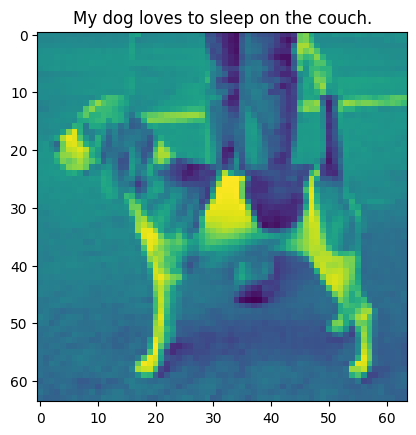

1/1 [==============================] - 0s 233ms/step
Image predict: dog.

Token predict: dog.

Result of pipeline: True


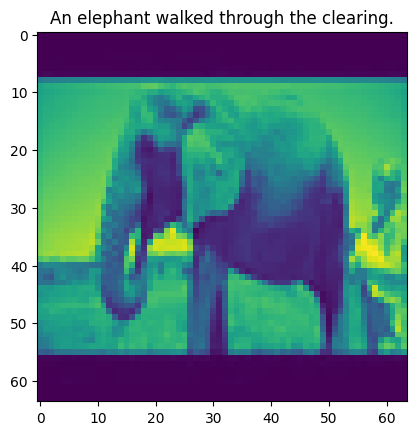

1/1 [==============================] - 0s 76ms/step
Image predict: panda.

Token predict: elephant.

Result of pipeline: False


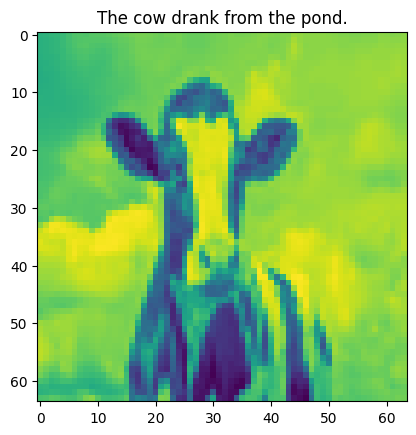

1/1 [==============================] - 0s 35ms/step
Image predict: cow.

Token predict: cow.

Result of pipeline: True


In [20]:


import numpy as np
from pipeline import Pipeline_for_task_2
import tensorflow as tf
import PIL
from ner_model_class import NERmodel
from PIL import Image
import matplotlib.pyplot as plt

path_to_image1='./Dog-Test (9).jpg'
path_to_image2='./Elephant-Test (380).jpeg'
path_to_image3='./Cow-Test (15).jpeg'

string= "The Unicorn pranced under the rainbow."

text1="My dog loves to sleep on the couch."
text2="An elephant walked through the clearing."
text3="The cow drank from the pond."

data=[(path_to_image1,text1),(path_to_image2,text2),(path_to_image3,text3)]

classification_model_path='image_classification_model.h5'
entity_recognition_model_path='./trained_ner_model'


pipeline=Pipeline_for_task_2(classification_model_path,entity_recognition_model_path)




ner_model=NERmodel(entity_recognition_model_path)

for img,text in data:
    image=np.asarray(Image.open(fr"{img}").convert('L').resize((64,64)))
    plt.imshow(np.squeeze(image))
    plt.title((text))
    plt.show()
    image=image.reshape((-1, 64, 64,1))

    
    result=pipeline.evaluate(image,text)

    print(f'Result of pipeline: {result}')

